Import Dependencies

In [9]:
import numpy as np
import random
import gym
from gym import Env
from gym.spaces import Discrete
import random
import matplotlib.pyplot as plt
import math
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

Agent

In [10]:
container_amount = 18
prio = ['H', 'L']
container_id = []
container_prio = []

for c in range(container_amount):
    container_id.append(c)
    container_prio_index = random.randrange(len(prio))
    container_prio.append(prio[container_prio_index])

container_data = np.column_stack((container_id,container_prio))

Environment

In [11]:
size = (3,3,2)
environment = np.array([([( [['0'] * size[2]]) * size[1] ]) * size[0] ]).astype(object)
env = environment

def scoreEnvironment(env):
    result = 0
    for x in range(env.shape[0]):
        for y in range(env.shape[1]):
            for z in range(Environment.shape[2]):
                result = (Environment[0,:,:] == 'L').sum()
                result -= (Environment[0,:,:] == 'H').sum()
                result -= (Environment[2,:,:] == 'L').sum()
                result += (Environment[2,:,:] == 'H').sum()
    return result


#return cleared environment
def clearEnvironment(env):
    return np.array([[['0'] * Size[2]] * Size[1]] * Size[0])

#generate status of board in Boolean array
def GenerateStatusDataset(env,dataType):
    return np.concatenate([np.array([dataType == 'H'],dtype=np.float32),np.array(env == 'L',dtype=np.float32).flatten(), np.array(env == 'H', dtype=np.float32).flatten(), np.array(env == '0',dtype=np.float32).flatten()])

State

In [12]:
def move(env, X, Y, Z):
    #if max height reached, place container somewhere else
    if Z>size[2] -1:
        return False
    
    #container can not be placed outside the lot
    if X<0 or X>= size[0] or Y<0 or Y>= size[1]:
        return False
    
    #container can not be placed when there already is one
    if env[X][Y][Z] !='0':
        return False
    
    #container can not be floating
    if not env[X][Y][:Z].all() !='0':
        return False
    
    #container in the middle
    if Y-1 != -1 and Y+1 != size[1]:
        if env[X][Y-1][0] != '0' and env[X][Y+1][0] !='0':
            return False
        
    return True

Action

In [13]:
def action_XYZ(action):
    value = action
    
    for a in range(size[0] + 1):
        if value <= a * (size[1] * size[2]):
            X = a - 1
            break 

    value_Y = value - (X * size[1] * size[2])

    for i in range(value_Y + 1):
        if value_Y <= i * (size[2]):
            Y = i - 1
            break

    Z = value_Y - Y * size[2] - 1
    return X,Y,Z

def place_container(action, prio, env):

    X,Y,Z = action_XYZ(action)
    
    if move(env, X,Y,Z):
        env[X][Y][Z] = prio
        return True, env
    else:
        return False, env

Reward & Punishment

In [14]:
class Environment():

    def __init__(self):
        self.action_space = Discrete(int(size[0]*size[1]*size[2]))
        self.observation_space = env.flatten()
        self.state = self.reset()
        self.poging = 0

    def step(self,action,prio):
        
        if type(self.state) == tuple:
            self.state = self.state[1]
        
        b = place_container(action,prio,self.state.reshape(size))
        
        if b[0]:
            reward = 4
            self.poging = 0
            
        else:
            reward = -1
            self.poging += 1
            
        self.state = b[1].flatten()
        return self.state, reward, self.state
        

    def reset(self):
        self.state = np.array([([( [[0] * size[2]]) * size[1] ]) * size[0] ]).astype(object).flatten()
        self.reward = 0
        self.poging = 0
        return self.reward, self.state

    def game_over(self):
        if (self.state == '0').sum() == 0 or self.poging >= int(size[0]*size[1]*size[2]):
            return True
        return False
    
    def state_(self):
        return self.state
    def action_state_(self):
        return self.action_space

Score

In [15]:
a = Environment()
z = a.reset()[1]
a.step(5,2)
a.game_over()
a.state_()

games = 3
scores = []

for game in range(1, games+1):
    done = False
    score = 0 
    
    #while not env.game_over():
        
        #action = env.action_space.sample() + 1
        #n_state, reward, done = env.step(action,'H')
        #score+=reward
    print('Game:{} Score:{}'.format(game, score))
    scores.append(score)

Game:1 Score:0
Game:2 Score:0
Game:3 Score:0


Result

Text(0, 0.5, 'Score')

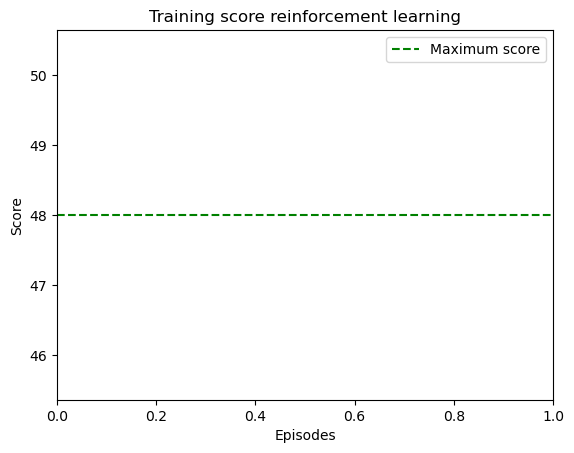

In [16]:
MaxEpisode = 50000
SmoothingFactor = 500

#plt.plot(np.array(range(int(MaxEpisode/SmoothingFactor)))*SmoothingFactor,np.median(np.reshape(scores[:MaxEpisode],(-1,SmoothingFactor)),axis=1),color="red",label="Median score over "+ str(SmoothingFactor) + " games")
plt.axhline(y = 48, color = 'green', linestyle = '--',label="Maximum score")

plt.legend()
plt.title("Training score reinforcement learning")
plt.xlabel("Episodes")
plt.ylabel("Score")